# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()
df.shape

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


(130, 3)

### 1. Is the distribution of body temperatures normal?

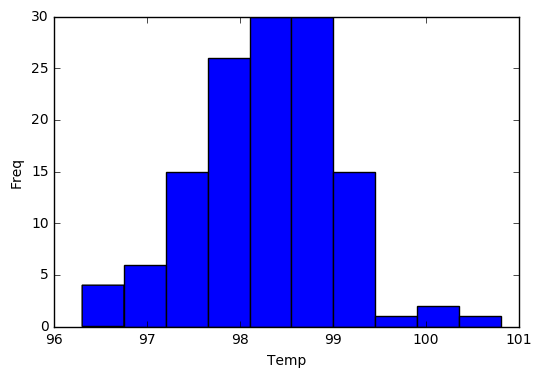

In [5]:
import matplotlib.pyplot as plt

plt.hist(df.temperature)
plt.xlabel('Temp')
plt.ylabel('Freq')
plt.show();

In [8]:
import numpy as np

In [12]:
print('Mean: {}'.format(df.temperature.mean()))
print('Median: {}'.format(df.temperature.median()))
print('Standard Deviation: {}'.format(np.std(df.temperature)))

Mean: 98.24923076923078
Median: 98.3
Standard Deviation: 0.7303577789050377


In [6]:
import scipy.stats as stats

stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

With a p-value of 0.25, we fail to reject the null hypothesis that the distribution of body temperature is normal.

### 2. Is the sample size large? Are the observations independent?

In [26]:
z = 1.96
std = np.std(df.temperature)
me = 0.05

(np.square(z) * std * (1 - std)) / np.square(me)

302.618649707999

With a 95% confidence interval and a margin of error of 5%, the sample size is not large enough. The observations are independent.

### 3. Is the true population mean really 98.6 degrees F?

$H_0 = 98.6$

$H_1 \neq 98.6$ 

$\alpha = .05$

In [30]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

With a small p-value, we reject the null hypothesis that the true population mean is 98.6 degrees F.

In [32]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

For a t-test, the p-value is still small, therefore we still reject the null hypothesis.

### 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [35]:
stats.norm.interval(.95, loc=df.temperature.mean(), scale=std/np.sqrt(len(df)))

(98.123682111456645, 98.37477942700491)

We consider someone's temperature to be 'abnormal' when it falls outside these bounds.

### 5. Is there a significant difference between males and females in normal temperature?

We need to do a 2 sample hypothesis test here.

In [38]:
female_temp = df[df.gender == 'F'].temperature
male_temp = df[df.gender == 'M'].temperature

female_temp.head()
male_temp.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [39]:
stats.ttest_ind(female_temp, male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

With a p-value of 0.024, we can reject the null hypothesis that there isn't a significant difference between the normal temperature of males and females.